In [1]:
import numpy as np
import pandas as pd

In [71]:
# read data from all the csv files
pork = pd.read_csv('xiachufang_pork.csv')
chicken = pd.read_csv('xiachufang_chicken.csv')
beef = pd.read_csv('xiachufang_beef.csv')
lamb = pd.read_csv('xiachufang_lamb.csv')
duck = pd.read_csv('xiachufang_duck.csv')
fish = pd.read_csv('xiachufang_fish.csv')
shrimp = pd.read_csv('xiachufang_shrimp.csv')
egg = pd.read_csv('xiachufang_egg.csv')
tofu = pd.read_csv('xiachufang_tofu.csv')

In [72]:
# initial cleaning of the dataset arranging indices/columns and drop duplicates
all_recipes = pd.concat([pork,chicken,beef,lamb,duck,fish,shrimp,egg,tofu], axis = 0, sort = False)
all_recipes = all_recipes.drop_duplicates()
all_recipes = all_recipes.dropna(axis = 0, how = 'any')
all_recipes = all_recipes.set_index('title')
all_recipes = all_recipes[['ingredients','author','master','num_tried','rating','picture','exclusive']]

In [73]:
all_recipes.sample(10)

,ingredients,author,master,num_tried,rating,picture,exclusive
title,,,,,,,
鸡腿炖土豆超级快手菜,"鸡腿,土豆,胡萝卜",蔡_小菲,False,384,8.0,True,False
"减肥也能吃的美味—香烤鸡胸肉,嫩嫩嫩！","鸡胸肉,黑胡椒,盐,蒜蓉",星星掉落在泡泡浴里,False,135,7.0,True,False
西红柿鸡蛋面,"西红柿,鸡蛋,葱",皮皮Gillian,False,551,7.6,True,False
超好吃的排骨糯米饭,"排骨,糯米,姜,老抽,生抽,料酒,蚝油,鸡精,盐",零零烘焙,False,304,8.2,True,True
奥尔良烤鸡翅烤箱版（极美滋调料）,"鸡翅,植物油",李小宅8829,False,286,8.0,True,True
空气炸锅烤羊排,"羊排,生抽,盐,黑胡椒,孜然粉,迷迭香",小糯米和花卷卷,False,195,8.3,True,True
好喝到爆的西红柿鸡蛋汤,"西红柿,鸡蛋,盐",维多利亚在瑞典,False,4432,7.9,False,False
卤牛肉,"牛腱,牛筋,白酒,生抽,老抽,冰糖,八角,桂皮,京葱,干辣椒,老姜",驴妈咪,True,1501,8.2,True,True
烤箱版土豆烤五花肉,"五花肉,土豆,洋葱,胡萝卜,黑胡椒,孜然粉,料酒,盐,生粉,老干妈,辣椒粉,姜末,番茄酱,食...",小胶姑,False,1100,7.9,True,True


In [74]:
# top 10 recipe
all_recipes.sort_values('num_tried', ascending = False).head(10)

,ingredients,author,master,num_tried,rating,picture,exclusive
title,,,,,,,
可乐鸡翅,"可乐,盐,料酒,老抽,生抽",渍,True,68706,8.2,True,True
根本停不下来的糖醋排骨,"料酒,生抽,冰糖,白醋,八角",笑货吃货,False,36799,8.7,True,True
喷香排骨焖饭（爆好吃）,"肋排,胡萝卜,香菇,葱,姜,蒜瓣,生抽,老抽,耗油,冰糖",菡小丫的妈咪,False,24704,8.6,True,False
红烧排骨,"排骨,葱,姜,蒜,盐,生抽,老抽,料酒,白糖,鸡精",NZmom,True,21236,8.1,True,False
可乐鸡翅,"鸡翅,干红辣椒,可乐,老抽",希洛大大大大人,True,20837,8.1,True,True
麻婆豆腐,"豆腐,郫县豆瓣,肉沫,花椒粒,辣椒粉,水淀粉,小葱",大花花西瓜瓜,False,20806,7.8,True,False
红烧肉沫茄子,"茄子,猪肉,小米椒,葱,姜,蒜,生抽,料酒,白胡椒粉,老抽,生粉,盐,白糖",梅子厨艺,False,20204,7.9,True,False
糖醋里脊,"猪里脊,白糖,番茄酱,鸡蛋,姜,生粉,白胡椒粉,盐,白芝麻",apple爱自己,False,18632,8.0,True,False
葱花鸡蛋饼,"鸡蛋,面粉,葱花,盐,水",偏离.于墨尔本.,True,18100,7.6,True,False


In [75]:
np.sum(all_recipes.isnull(), axis = 0)

ingredients    0
author         0
master         0
num_tried      0
rating         0
picture        0
exclusive      0
dtype: int64

In [76]:
all_recipes.nunique()

ingredients    3068
author         1611
master            2
num_tried      1225
rating           34
picture           2
exclusive         2
dtype: int64

In [77]:
all_recipes.dtypes

ingredients     object
author          object
master          object
num_tried        int64
rating         float64
picture           bool
exclusive         bool
dtype: object

In [78]:
all_recipes.describe()

,num_tried,rating
count,3105.000000,3105.000000
mean,843.733011,7.927633
std,2142.863959,0.450504
min,100.000000,6.200000
25%,175.000000,7.600000
50%,322.000000,7.900000
75%,711.000000,8.200000
max,68706.000000,9.500000


In [79]:
ingred = []
for i in range(len(all_recipes)):
    ingred += all_recipes['ingredients'][i].split(',')
ingred = set(ingred)
len(ingred)

909

In [80]:
# There are 928 ingredients and this needs to be organized since people sometimes refer to the same thing with 
# different names, so we write the following function to normalize it
def normalize_ingredients(list_):
    '''
    Input: list of ingredients in Chinese
    Output: list of ingredients, most in English and some in Chinese which avoids confusion caused by namings    
    '''
    for n, i in enumerate(list_):
        if i in {'三奈','仔姜','姜','姜丝','姜块','姜末','姜汁','姜泥','姜片','姜碎', '姜粉', \
                 '姜花','姜茸', '姜蓉','姜黄粉', '嫩姜','山奈','干姜','鲜姜', '泡姜','老姜','良姜','生姜','沙姜'}:
            list_[n] = 'ginger'
        elif i in {'中筋面粉', '中筋粉', '中粉', '低筋粉', '低筋面粉', '低粉','全麦粉','小麦粉','高筋面粉','高粉'}:
            list_[n] = 'flour'
        elif i in {'乌鸡', '土鸡', '小鸡腿','鸡脯肉','鸡腿','鸡腿肉','鸡胸','鸡胸肉','鸡胸脯肉','鸡翅','鸡翅中','鸡翅根',\
                   '鸡翅膀','鸡肉','鸡','鸡中翅','鸡块','老母鸡','童子鸡','翅中','琵琶腿'}:
            list_[n] = 'chicken'
        elif '鸡' in i or i in {'凤爪'}:
            list_[n] = 'other chicken products'
        elif i in {'五花肉','午餐肉', '叉烧肉','咸肉', '培根', '小排','排骨','里脊','里脊肉','肉馅','肉糜','肉','肉丝',\
                   '肉末','瘦猪肉','瘦肉','猪里脊','猪里脊肉','猪肋排','猪肉末','猪肉','猪绞肉','猪瘦肉','猪扒','猪排',\
                   '猪排骨','猪小排','猪五花','猪五花肉','腊肉','肋排','肉沫','香肠'}:
            list_[n] = 'pork'
        elif i in {'腊肠','肥肠','肉皮','肉蔻','肉蔻粉'}:
            list_[n] = 'other pork products'
        elif '猪' in i:
            list_[n] = 'other pork products'
        elif i in {'肥牛', '瘦牛肉','牛肉','牛肉末','牛腩','牛腩肉','牛腱','牛腱肉','牛里脊','牛里脊肉'}:
            list_[n] = 'beef'
        elif i in {'羊排','羊肉','羊肉汤','羊肉片','羊脊骨','羊腿'}:
            list_[n] = 'lamb'
        elif i in {'姜蒜','姜蒜片'}:
            list_[n] = 'ginger'
            list_.append('garlic')
        elif i in {'葱蒜','葱蒜末'}:
            list_[n] = 'scallion'
            list_.append('garlic')
        elif i == {'姜葱','葱姜','葱姜丝','葱姜末'}:
            list_[n] = 'ginger'
            list_.append('scallion')
        elif i in {'姜葱蒜','葱姜蒜','葱姜蒜末'}:
            list_[n] = 'ginger'
            list_.extend(['scallion', 'garlic'])        
        elif '葱' in i:
            list_[n] = 'scallion'
        elif i in {'全蛋', '土鸡蛋', '鹌鹑蛋','鸡蛋','鸡蛋清','鸡蛋黄','蛋黄','蛋黄液','蛋','蛋液','蛋清','蛋白'}:
            list_[n] = 'egg'
        elif i in {'千张','豆泡','豆渣','豆干', '豆腐干','豆腐皮','油豆皮','油豆腐','腐竹','香干'}:
            list_[n] = 'tofu product'
        elif '腐乳' in i:
            list_[n] = 'tofu product'
        elif '豆腐' in i:
            list_[n] = 'tofu'
        elif '水' in i or '凉白开' in i or '冰' in i:
            list_[n] = 'water'
        elif '菇' in i or '蘑' in i:
            list_[n] = 'mushroom'
        elif '糖' in i:
            list_[n] = 'sugar'
        elif '黑胡椒' in i or '黑椒碎' in i:
            list_[n] = 'black pepper'
        elif '白胡椒' in i:
            list_[n] = 'white pepper'
        elif '椒' in i:
            list_[n] = 'hot peppers'
        elif '龙虾' in i:
            list_[n] = 'lobster'
        elif '虾' in i:
            list_[n] = 'shrimp'
        elif i == '南乳':
            list_[n] = '南乳汁'
        elif '可乐' in i :
            list_[n] = 'coke'
        elif i in {'味啉', '味淋', '味醂', '味霖'}:
            list_[n] = 'mirin'
        elif '咖喱' in i or '咖哩' in i:
            list_[n] = 'curry'
        elif i in {'咸蛋', '咸蛋黄', '咸鸭蛋','松花蛋','笨鸡蛋'}:
            list_[n] = 'other eggs'
        elif i in {'土豆淀粉', '地瓜粉','干淀粉','干生粉','木薯淀粉','木薯粉', '淀粉','芡实','芡粉',\
                   '生粉','生粉水','玉米淀粉','玉米粉','湿淀粉','澄粉','泡打粉','水淀粉','水芡粉'}:
            list_[n] = 'starch'
        elif i in {'大土豆', '土豆', '地瓜','小土豆'} or '马铃' in i or '薯' in i:
            list_[n] = 'potatoes'
        elif i in {'大肠'}:
            list_[n] = 'other pork product'
        elif i in {'奶油', '奶油奶酪','奶油霜','鲜奶油'}:
            list_[n] = 'cream'
        elif '蒜' in i:
            list_[n] = 'garlic'
        elif i in {'孜然','孜然粉','孜然粒', '小茴香','丁香','当归','五香粉','党参','八瓣','八角','十三香','大料','大枣','坚果',\
                   '香料','香菜','香菜末','迷迭香','木耳','杏仁','杏仁露','杞子','松子','松茸','板栗','枣','枸杞','枸杞子',\
                   '核桃','核桃仁','桂圆干','桂圆肉','桂枝','桂皮','燕麦','燕麦片','红枣', '腰果','百里香','栗子','开心果',\
                   '瓜子仁','百合','白果','葡萄干','蓝莓','蔓越莓','虫草花','话梅','蜜枣','薄荷叶','茯苓','茴香','无花果',\
                   '月桂叶','木耳','甘草','香草','香叶','陈皮','牛至','肉桂'}:
            list_[n] = 'spice or dry products'
        elif i in {'山楂','山楂干','干山楂'}:
            list_[n] = 'hawthorn'
        elif i in {'包菜','卷心菜','大白菜','小白菜','圆白菜','娃娃菜','高丽菜'}:
            list_[n] = 'cabbage'
        elif '面' in i:
            list_[n] = 'noodles'
        elif '酒' in i:
            list_[n] = 'alcohol'
        elif '酱油' in i or '生抽' in i or '老抽' in i or '味极鲜' in i:
            list_[n] = 'soy sauce'
        elif i in {'鱼子','鱼籽','鱼露'}:
            list_[n] = 'other fish product'
        elif i in {'蒸鱼豉油'}:
            list_[n] = 'special sauce for cooking seafood'
        elif '鱼' in i:
            list_[n] = 'fish'
        elif i in {'鸭子', '鸭肉', '鸭翅','鸭腿','老鸭'}:
            list_[n] = 'duck'
        elif '鸭' in i:
            list_[n] = 'other duck products'
        elif '醋' in i:
            list_[n] = 'vinegar'
        elif '油' in i:
            list_[n] = 'oil'
        elif '面包' in i:
            list_[n] = 'bread'
        elif i in {'粉丝','粉条','粉皮','粘米粉','河粉'}:
            list_[n] = 'other noodles'
        elif '饭' in i:
            list_[n] = 'rice'
        elif '米' in i:
            list_[n] = 'rice'
        elif '牛' in i:
            list_[n] = 'other beef products'
        elif '羊' in i:
            list_[n] = 'other lamb products'
        elif '笋' in i:
            list_[n] = 'bamboo shoots'
        elif '味增' in i or '味噌' in i:
            list_[n] = 'miso'
        elif '番茄' in i or '西红柿' in i or '圣女果' in i or '蕃茄' in i:
            list_[n] = 'tomatoes or tomato products'
        elif '螺' in i:
            list_[n] = 'shell'
        elif '玉米' in i:
            list_[n] = 'corn'
        elif '火腿' in i:
            list_[n] = 'pork'
        elif '盐' in i:
            list_[n] = 'salt'
        elif '木耳' in i:
            list_[n] = '木耳'
        elif '奶' in i:
            list_[n] = 'milk related products'
        elif '豆瓣' in i:
            list_[n] = 'bean sauce'
        elif '蟹' in i:
            list_[n] = 'crabs'
        elif '玉米' in i:
            list_[n] = 'corn'
        elif '酱' in i or i in {'调味料','调料','红曲粉','红烧汁','奥尔良腌料','嫩肉粉','抹茶粉','排骨汤','浓汤宝','清汤',\
                               '火锅底料','老干妈'}:
            list_[n] = 'other special cooking sauce'
        elif '味精' in i or '鸡精' in i:
            list_[n] = 'MSG'
        elif '豆芽' in i:
            list_[n] = 'bean sprouts'
        elif '芝士' in i:
            list_[n] = 'cheese'
        elif '胡萝卜' in i:
            list_[n] = 'carrots'
        elif '肉桂' in i:
            list_[n] = 'spice or dry products'
        elif '罗勒' in i:
            list_[n] = 'spice or dry products'
        elif i in {'可可粉'} or '巧克力' in i:
            list_[n] = 'chocolate'
        elif '黄瓜' in i:
            list_[n] = 'cucumber'
        elif '年糕' in i:
            list_[n] = 'ricecake'
        elif i in {'料洒','花雕'}:
            list_[n] = 'alcohol'
        elif i in {'生菜叶'}:
            list_[n] = '生菜'
        elif i in {'白菜叶'}:
            list_[n] = '白菜'
        elif '花生' in i:
            list_[n] = 'peanuts'
        elif '芝麻' in i:
            list_[n] = 'sesame'
        elif '苏打' in i or '碱' in i:
            list_[n] = 'soda'
        elif '柠' in i:
            list_[n] = 'lemon or lime'
        elif '韭' in i:
            list_[n] = '韭菜'
        elif '芹' in i:
            list_[n] = 'celery'
        elif '酵母' in i:
            list_[n] = 'yeast'
        elif i in {'咸菜', '梅干菜','酸菜','酸豆角','酸豇豆','辣白菜','腌菜','泡菜','榄菜','榨菜', '橄榄菜'}:
            list_[n] = '腌菜'
        elif '木耳' in i:
            list_[n] = 'spice or dry products'
        elif '豆' in i:
            list_[n] = 'beans'
        elif i in {'莲子','莲藕','藕'}:
            list_[n] = 'lotus'
        elif '木耳' in i:
            list_[n] = 'spice or dry products'
        elif '甘蓝' in i:
            list_[n] = '甘蓝'
        elif '萝卜' in i:
            list_[n] = '萝卜'
    return list_

In [81]:
# after organizing ingredients, we reduce the ingredients to 170 types
ingreds = []
for i in range(len(all_recipes)):
    ingred = all_recipes['ingredients'][i].split(',')
    ingred = normalize_ingredients(ingred)
    ingreds += ingred
ingreds = set(ingreds)
len(ingreds)

170

In [82]:
ingreds

{'MSG',
 'alcohol',
 'bamboo shoots',
 'bean sauce',
 'bean sprouts',
 'beans',
 'beef',
 'black pepper',
 'cabbage',
 'carrots',
 'celery',
 'cheese',
 'chicken',
 'chocolate',
 'coke',
 'crabs',
 'cream',
 'cucumber',
 'curry',
 'egg',
 'fish',
 'flour',
 'garlic',
 'ginger',
 'hawthorn',
 'hot peppers',
 'lamb',
 'lemon or lime',
 'lobster',
 'lotus',
 'milk related products',
 'mirin',
 'miso',
 'mushroom',
 'noodles',
 'oil',
 'other beef products',
 'other chicken products',
 'other duck products',
 'other eggs',
 'other fish product',
 'other lamb products',
 'other noodles',
 'other pork product',
 'other pork products',
 'other special cooking sauce',
 'peanuts',
 'pork',
 'potatoes',
 'rice',
 'ricecake',
 'salt',
 'scallion',
 'sesame',
 'shell',
 'shrimp',
 'soda',
 'soy sauce',
 'special sauce for cooking seafood',
 'spice or dry products',
 'starch',
 'sugar',
 'tofu',
 'tofu product',
 'tomatoes or tomato products',
 'vinegar',
 'water',
 'white pepper',
 'yeast',
 '丝瓜',

In [83]:
# apply the normalize_ingredients function to each row's ingredients
all_recipes['ingredients'] = list(map(lambda list_: normalize_ingredients(list_.split(',')), \
                                      all_recipes['ingredients']))

In [85]:
# calculate how many ingredients are needed for each recipe
all_recipes['num_ingred'] = all_recipes['ingredients'].apply(lambda list_: len(list_))
all_recipes = all_recipes[['ingredients','num_ingred','author','master','num_tried','rating','picture','exclusive']]

In [88]:
all_recipes.sample(10)

,ingredients,num_ingred,author,master,num_tried,rating,picture,exclusive
title,,,,,,,,
鸡蛋葱花饼,"[noodles, other chicken products, scallion, sa...",5,乌兰图雅小时光,False,569,7.8,False,True
双椒煎排骨,"[hot peppers, scallion, sugar, alcohol, soy sa...",6,大猫爪和小猫爪,True,3510,8.1,True,True
鸡肉丸子青菜汤,"[other chicken products, water, 青菜, oil, salt,...",7,小瓶子AJ,False,387,7.6,False,False
超好吃的排骨糯米饭,"[pork, rice, ginger, soy sauce, soy sauce, alc...",9,零零烘焙,False,304,8.2,True,True
叉烧鸡翅,"[chicken, other special cooking sauce, 蜂蜜, sal...",5,静静下午茶,False,174,8.4,True,False
白菜干猪骨汤,"[spice or dry products, ginger, salt]",3,无可就要&吴慢慢,False,122,7.8,False,False
蜜汁小三角豆干,"[tofu product, oil, soy sauce, water, spice or...",8,葉子的爱与厨房,True,121,8.0,True,False
大手拉小手（猪蹄焖鸡爪）,"[other pork products, other chicken products]",2,静的时光9,True,163,8.8,True,True
砂锅白菜豆腐,"[tofu, 白菜, ginger, salt]",4,小白素食记录,True,1341,7.5,False,False


### Study of the relationships between num_tried, rating, picture and exclusive
    1. What is the relationship between num_tried and rating?
    2. What is the relationship between exclusive and num_tried/rating?
    3. What is the relationship between picture and num_tried/rating?
    

In [178]:
%matplotlib inline

In [179]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

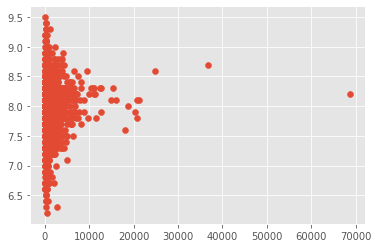

In [180]:
plt.scatter(all_recipes['num_tried'], all_recipes['rating'])

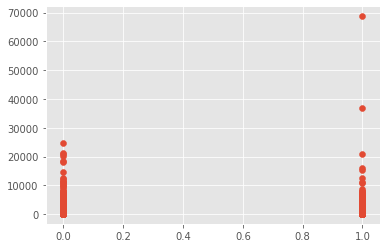

In [182]:
plt.scatter(all_recipes['exclusive'], all_recipes['num_tried'])

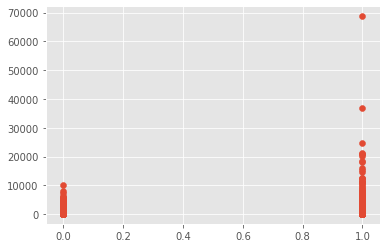

In [183]:
plt.scatter(all_recipes['picture'], all_recipes['num_tried'])

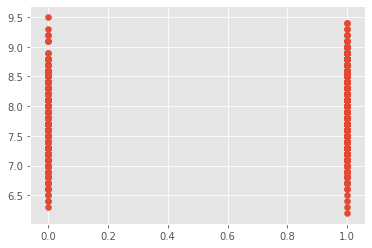

In [184]:
plt.scatter(all_recipes['picture'], all_recipes['rating'])

(array([  9.,  42.,  92., 432., 710., 883., 693., 189.,  45.,  10.]),
 array([6.2 , 6.53, 6.86, 7.19, 7.52, 7.85, 8.18, 8.51, 8.84, 9.17, 9.5 ]),
 <a list of 10 Patch objects>)

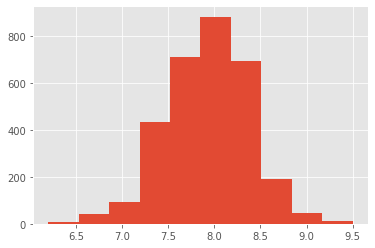

In [238]:
plt.hist(all_recipes['rating'])

## Study of Different Groups Using Groupby
#### Groupby Study Master Cooks

In [122]:
# master chefs
authors = all_recipes[['author', 'master']]
authors = authors.drop_duplicates()
master_ratio = sum(authors['master'])/len(authors)
print('The percentage of master cooks is %.2f'%master_ratio + '.')

The percentage of master cooks is 0.18.


In [123]:
master_recipe = sum(all_recipes['master'])/len(all_recipes)
print('The percentage of recipes prepared by master cooks is %.2f'%master_recipe + '.')

The percentage of recipes prepared by master cooks is 0.37.


In [127]:
ifMaster = all_recipes.groupby(['master'])
colFun = {'num_tried':['count','sum','mean','min','max'],
          'rating':['count','min','max','mean','std']}
ifMaster.agg(colFun)

num_tried                                  rating                      \
           count      sum        mean  min    max  count  min  max      mean   
master                                                                         
False       1943  1510529  777.420998  100  36799   1943  6.2  9.4  7.858724   
True        1162  1109262  954.614458  100  68706   1162  6.3  9.5  8.042857   

                  
             std  
master            
False   0.430810  
True    0.459267

In [129]:
ifMaster.agg(['count', 'mean'])[['exclusive', 'picture']]

exclusive           picture          
           count      mean   count      mean
master                                      
False       1943  0.210499    1943  0.659290
True        1162  0.465577    1162  0.756454

#### Groupby Study Exclusive

#### Groupby Study Picture

#### Groupby Study Authors

In [101]:
authorGroup = all_recipes.groupby(['author'])

In [113]:
authorGroup.size().sort_values(ascending = False).to_frame().head(10)

,0
author,
冇伱灬冇我,47
yanyanfoodtube,38
玉池桃红,38
懒饭App,37
日食记,32
Sunny_Kreglo,27
apple爱自己,27
呤儿,25
堂妈小厨,24


In [119]:
all_recipes[all_recipes.author == '冇伱灬冇我'].describe()

,num_ingred,num_tried,rating
count,47.000000,47.000000,47.000000
mean,11.255319,1291.468085,8.385106
std,2.988879,2113.563741,0.309262
min,3.000000,110.000000,7.400000
25%,9.000000,254.000000,8.200000
50%,12.000000,407.000000,8.400000
75%,13.000000,1669.000000,8.600000
max,17.000000,11093.000000,9.100000


#### Groupby Study Number of Ingredients

In [ ]:
ingre_group